In [35]:
#test construction of the Hamiltonian

include("../src/Atoms.jl")
include("../src/scfOptions.jl")
include("../src/anderson_mix.jl")
include("../src/kerker_mix.jl")
include("../src/Ham.jl")
include("../src/hartree_pot_bc.jl")
include("../src/pseudocharge.jl")
include("../src/getocc.jl")


dx = 0.25;
Nunit = 8;
Lat = 10;
# using the default values in Lin's code
YukawaK = 0.0100
n_extra = 10; # QUESTION: I don't know where this comes from
epsil0 = 10.0;
T_elec = 100.0;

kb = 3.1668e-6;
au2K = 315774.67;
Tbeta = au2K / T_elec;

betamix = 0.5;
mixdim = 10;

Ndist  = 1;   # Temporary variable
Natoms = round(Integer, Nunit / Ndist); # number of atoms

R = zeros(Natoms, 1); # this is defined as an 2D array
for j = 1:Natoms
  R[j] = (j-0.5)*Lat*Ndist;
end

sigma  = ones(Natoms,1)*(2.0);  # insulator
omega  = ones(Natoms,1)*0.03;
Eqdist = ones(Natoms,1)*10.0;
mass   = ones(Natoms,1)*42000.0;
nocc   = ones(Natoms,1);          # number of electrons per atom
Z      = nocc;

# creating an atom structure
atoms = Atoms(Natoms, R, sigma,  omega,  Eqdist, mass, Z, nocc);

# allocating a Hamiltonian
ham = Ham(Lat, Nunit, n_extra, dx, atoms,YukawaK, epsil0, Tbeta)

# total number of occupied orbitals
Nocc = round(Integer, sum(atoms.nocc) / ham.nspin);

# initialize the potentials within the Hemiltonian, setting H[\rho_0]
init_pot!(ham, Nocc)

# we use the anderson mixing of the potential
mixOpts = andersonMixOptions(ham.Ns, betamix, mixdim )

# we use the default options
eigOpts = eigOptions();

scfOpts = scfOptions(eigOpts, mixOpts)

# running the scf iteration
@time VtoterrHist = scf!(ham, scfOpts)

  3.450528 seconds (3.26 M allocations: 847.905 MiB, 7.38% gc time)


28-element Array{Float64,1}:
 Inf          
   1.57348    
   0.951793   
   0.428217   
   0.32344    
   9.63206    
   0.0519533  
   0.0439908  
   0.0289972  
   0.0147417  
   0.00435758 
   0.0273822  
   0.0239914  
   ⋮          
   0.215887   
   0.000554991
   0.000643488
   0.00104543 
   0.0016855  
   0.00150593 
   0.000531694
   0.000625229
   8.22954e-6 
   1.28874e-5 
   4.569e-6   
   9.80805e-9 

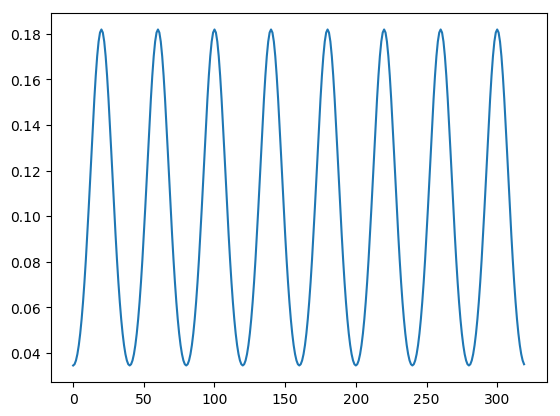

In [36]:
rho = ham.rho;
plot(rho);

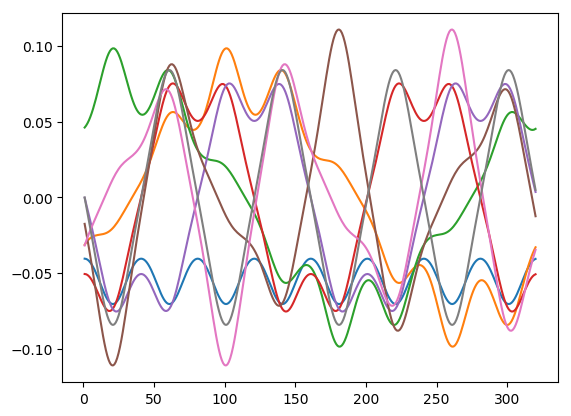

8-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x133713290>
 PyObject <matplotlib.lines.Line2D object at 0x133713510>
 PyObject <matplotlib.lines.Line2D object at 0x1337135d0>
 PyObject <matplotlib.lines.Line2D object at 0x133713650>
 PyObject <matplotlib.lines.Line2D object at 0x133713590>
 PyObject <matplotlib.lines.Line2D object at 0x133713810>
 PyObject <matplotlib.lines.Line2D object at 0x1337138d0>
 PyObject <matplotlib.lines.Line2D object at 0x1335cec50>

In [37]:
psi = ham.psi[:,1:Nocc];
plot(1:320,psi[:,1:8])

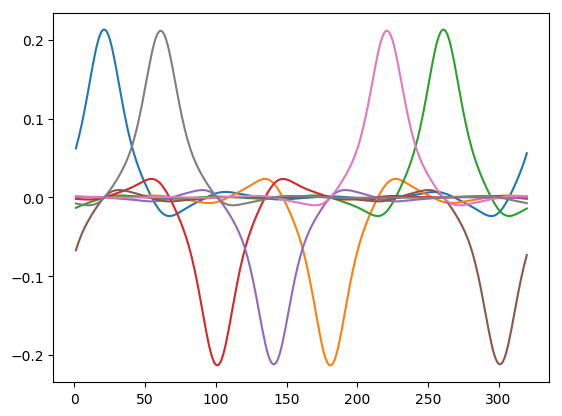

In [39]:
psi = ham.psi[:,1:Nocc];
F = qrfact(psi',Val{true});
psi = psi*F[:Q];

 plot(1:320,psi[:,1:8]);